In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense

Class C2
Class C2
Class C2
Class C2
Class C2


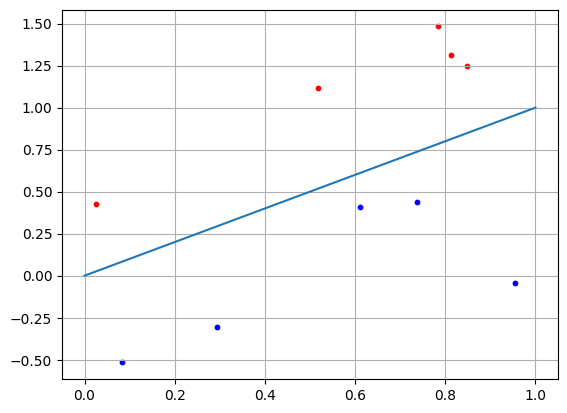

In [4]:
N = 5

x1 = np.random.random(N)
x2 = x1 + [np.random.randint(10)/10 for i in range(N)]
C1 = [x1,x2]

x1 = np.random.random(N)
x2 = x1 - [np.random.randint(10)/10 for i in range(N)] - 0.1
C2 = [x1,x2]

f = [0,1]

w = np.array([-0.3,0.3])
for i in range(N):
    x = np.array([C2[0][i], C2[1][i]])
    y = np.dot(w,x)
    if y >= 0:
         print("Class C1")
    else:
         print("Class C2")

plt.scatter(C1[0][:], C1[1][:], s=10, c='red')
plt.scatter(C2[0][:], C2[1][:], s=10, c='blue')
plt.plot(f)
plt.grid(True)
plt.show()

In [5]:
def f(x):
    return 2/(1 + np.exp(-x)) - 1
def df(x):
    return 0.5*(1+x)*(1-x)

W1 = np.array([[-0.3, 0.1,0.4],
               [-0.1,0.5,-0.4]])
W2 = np.array([0.1,-0.4])

def go_forward(inp):
    sum = np.dot(W1, inp)
    out = np.array([f(x) for x in sum])

    sum = np.dot(W2, out)
    y = f(sum)
    return (y, out)

def train(epoch):
    global W2, W1
    lmd = 0.01
    N = 10000
    count = len(epoch)
    for k in range(N):
        x = epoch[np.random.randint(0, count)]
        y, out = go_forward(x[0:3])
        e = y - x[-1]
        delta = e*df(y)
        W2[0] = W2[0] - lmd * delta * out[0]
        W2[1] = W2[1] - lmd * delta * out[1]
        
        delta2 = W2*delta*df(out)

        W1[0, :] = W1[0, :] - np.array(x[0:3]) * delta2[0] * lmd
        W1[1, :] = W1[1, :] - np.array(x[0:3]) * delta2[1] * lmd

epoch = [(-1, -1, -1, -1),
         (-1, -1, 1, 1),
         (-1, 1, -1, -1),
         (-1, 1, 1, 1),
         (1, -1, -1, -1),
         (1, -1, 1, 1),
         (1, 1, -1, -1),
         (1, 1, 1, 1)]

train(epoch)

for x in epoch:
    y, out = go_forward(x[0:3])
    print(f"Выходное значение НС: {y} => {x[-1]}")

Выходное значение НС: -0.934177506530242 => -1
Выходное значение НС: 0.9379885114095066 => 1
Выходное значение НС: -0.9342939156277253 => -1
Выходное значение НС: 0.9358697042677089 => 1
Выходное значение НС: -0.9358697042677089 => -1
Выходное значение НС: 0.9342939156277252 => 1
Выходное значение НС: -0.9379885114095066 => -1
Выходное значение НС: 0.9341775065302422 => 1


In [ ]:
c = np.array([-40, -10, 0, 8, 15, 22, 38])
f = np.array([-40, 14, 32, 46, 59, 72, 100])

model = keras.Sequential()
model.add(Dense(units=1, input_shape=(1,), activation='linear'))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))

log = model.fit(c, f, epochs=500, verbose=False)
print("Обучение завершено")

print(model.predict([100]))
print(model.get_weights())

c:\Users\pasha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Обучение завершено


ValueError: Unrecognized data type: x=[100] (of type <class 'list'>)